<center> <h1>
Pricing of financial derivatives using Monte Carlo simulations [with python]
 </h1></center>

<center> <h2>Gilles HACHEME </h2></center>

Goal:

- Studying the speed of convergence of the Monte Carlo (MC) estimation of a call option
price in the Black Scholes (BS) framework, and study the convergence of the MC estimator of the BS price.

- Estimating the sensitivities of the price to an increase of $\sigma$ (vega) or the interest rate $r$ (rho) ? Comparing to the BS closed formulas.

- Computing by finite difference, using MC, the sensitivity to a move of the underlying (well known as the Delta...); and studying the convergence speed of the Delta (number of simulations becoming bigger and bigger). 

- Explaining how MC estimations behave when we get closer to the maturity.

Parameters: $S_0 = 100$, $r = 2\%$, $ \sigma= 30\%$, $K = 100$.

#### A - Study of the speed of convergence of the Monte Carlo estimation of a call option price in the Black Scholes framework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Let's consider : 
- Initial stock index level $S_0 = 100$
- Strike price of the European call option $K = 100$
- Time-to-maturity $T = 1$ year
- Constant, riskless short rate $r = 2$%
- Constant volatility $\sigma = 30$%

Monte Carlo estimation of a call option price in the Black Scholes framework : 

$ C_0 \simeq \exp^{-rT} \frac{1}{N} \sum h_T (S_T (i)) $

with $S_t = S_{t-\Delta t} exp[ (r-\frac{1}{2}\sigma ^2) \Delta t + \sigma  z_t \sqrt{\Delta t} ] $

The estimation using a random seed of 10000:

In [2]:
#fixing a random state for the pseudo random-numbers
np.random.seed(10000)

# fonction for computing the Monte Carlo estimation 
# for a giving sample size




def mont(N, S0 = 100, K = 100, T = 1, r = 0.02, sigma = 0.3):

    M = 100
    dt = T / M
    

    # Simulating N paths with M time steps
    S = np.zeros((M + 1, N))
    S[0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(N) 
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * z)


    # Computing the Monte Carlo estimator
    C0 = np.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / N
    return C0

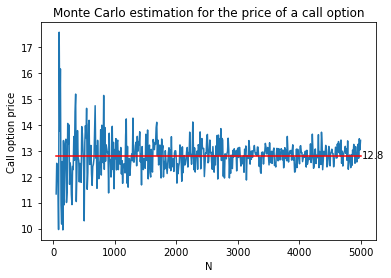

In [3]:
# Computing the Monte Carlo estimator for different 
#levels of sample size
N = [int(size) for size in np.linspace(start=50, stop=5000, num = 500)]
C = list(map(lambda size: mont(size), N))
mean_C = [np.mean(C)]*len(C)
plt.plot(N, C)
plt.plot(N, mean_C, "r")
plt.text(5020, 12.7, "{}".format(round(np.mean(C),2)))
plt.title("Monte Carlo estimation for the price of a call option")
plt.xlabel("N")
plt.ylabel("Call option price")
plt.show()               

We can easily notice that the convergence to the mean value (12.82) seems to be reached approximatively by N = 4000 obseravtions as the deviation from the mean becomes very small.  

#### B - Estimation of the sensitivities of the price to an increase of $\sigma$ (vega) or the interest rate r (rho), from MC experiments

The sensitiveness of the price to an increase of a parameter can be computed using finite difference.
Let us first fix N to 4000

- an increase of  $\sigma$ (vega) : 
    $ v = \lim_{d\sigma \rightarrow 0} \frac{C(\sigma+d\sigma,N)-C(\sigma,N)}{d\sigma}$
    

In [4]:
def vega(N, sigma,  delta=0.01, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 50
    dt = T / M
    

    # Simulating N paths with M time steps
    S1 = np.zeros((M + 1, N))
    S2 = np.zeros((M + 1, N))
    S1[0] = S0
    S2[0] = S0
    
    for t in range(1, M + 1):
        z = np.random.standard_normal(N) 
        S1[t] = S1[t - 1] * np.exp((r - 0.5 * (sigma ** 2)) * dt
        + sigma * np.sqrt(dt) * z)
        
        S2[t] = S2[t - 1] * np.exp((r - 0.5 * ((sigma+delta) ** 2)) * dt
        + (sigma+delta) * np.sqrt(dt) * z)

    # Computing the Monte Carlo estimator
    C1 = np.exp(-r * T) * np.sum(np.maximum(S1[-1] - K, 0)) / N
    C2 = np.exp(-r * T) * np.sum(np.maximum(S2[-1] - K, 0)) / N
    
    v = (C2 - C1)/delta
    return v

In [5]:
print("Vega = ", round(vega(N= 4000, sigma=0.3),2))

Vega =  38.2


- an increase of r (rho):
    $ \rho = \lim_{dr \rightarrow 0} \frac{C(r+dr,N)-C(r,N)}{dr}$
    


In [6]:
def rho(N, sigma,  delta=0.0001, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 50
    dt = T / M
    

    # Simulating N paths with M time steps
    S1 = np.zeros((M + 1, N))
    S2 = np.zeros((M + 1, N))
    S1[0] = S0
    S2[0] = S0
    
    for t in range(1, M + 1):
        z = np.random.standard_normal(N) 
        S1[t] = S1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * z)
        
        S2[t] = S2[t - 1] * np.exp(((r+delta) - 0.5 * (sigma) ** 2) * dt
        + sigma * np.sqrt(dt) * z)

    # Computing the Monte Carlo estimator
    C1 = np.exp(-r * T) * np.sum(np.maximum(S1[-1] - K, 0)) / N
    C2 = np.exp(-(r+delta) * T) * np.sum(np.maximum(S2[-1] - K, 0)) / N
    
    v = (C2 - C1)/delta
    return v

In [7]:
print("Rho = ", round(rho(N= 4000, sigma=0.3),2))

Rho =  45.76


- Comparison to the BS closed formulas.

the formula of  vega: $v=\frac{\partial C}{\partial \sigma} = S N'(d_{1})\sqrt{T}$

with $d_1 = \frac{ln(S/K)+(r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$

Let's compute the vega 

In [8]:
def vega_formula(S=100, r=0.02, T=1, K = 100, sigma = 0.3): 
    
    d1 = (np.log(S/K) + (r + (sigma**2)/2 )*T)/(sigma*np.sqrt(T))
    
    return S * norm.pdf(d1)*np.sqrt(T)

print("Vega using closed formula = ", round(vega_formula(),2))

Vega using closed formula =  38.97


The formula of the rho: $\rho = \frac{\partial C}{\partial r} = KTe^{-rT}N(d_2)$

Let's compute the vega

In [9]:
def rho_formula(S=100,r=0.02, T=1, K = 100, sigma = 0.3): 
    
    d2 = (np.log(S/K) + (r - (sigma**2)/2 )*T)/(sigma*np.sqrt(T))
    
    return K*T*np.exp(-r*T)*norm.cdf(d2)

print("Rho using closed formula = ", round(rho_formula(),2))

Rho using closed formula =  45.76


The results got using the closed formula are almost the same as the ones got with the Monte Carlo simulations

#### C- Let's now compute by finite difference, using MC, the sensitivity to a move of the underlying asset (Delta) : 

- an increase of S (Delta):
    $ \Delta = \lim_{dS \rightarrow 0} \frac{C(S+dS,N)-C(S,N)}{dS}$
    

In [10]:
def Delta(N, sigma = 0.3,  delta=0.0001, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 50
    dt = T / M
    

    # Simulating N paths with M time steps
    S1 = np.zeros((M + 1, N))
    S2 = np.zeros((M + 1, N))
    S1[0] = S0
    S2[0] = S0+delta
    
    for t in range(1, M + 1):
        z = np.random.standard_normal(N) 
        S1[t] = S1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt) * z)
        
        S2[t] = S2[t - 1] * np.exp((r - 0.5 * (sigma) ** 2) * dt
        + sigma * np.sqrt(dt) * z)

    # Computing the Monte Carlo estimator
    C1 = np.exp(-r * T) * np.sum(np.maximum(S1[-1] - K, 0)) / N
    C2 = np.exp(-r * T) * np.sum(np.maximum(S2[-1] - K, 0)) / N
    
    d = (C2 - C1)/delta
    return d

In [11]:
print("Delta = ", round(Delta(N= 4000),2))

Delta =  0.58


- Study of the convergence speed of the Delta

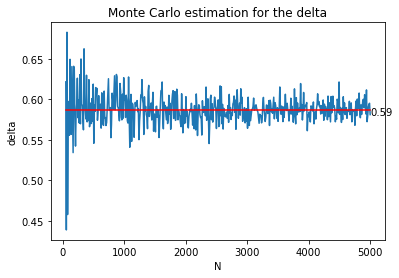

In [12]:
N = [int(size) for size in np.linspace(start=50, stop=5000, num = 500)]
deltas = list(map(lambda size: Delta(size), N))
mean_delta = [np.mean(deltas)]*len(deltas)
plt.plot(N, deltas)
plt.plot(N, mean_delta, "r")
plt.text(5000, 0.58, "{}".format(round(np.mean(deltas),2)))
plt.title("Monte Carlo estimation for the delta")
plt.xlabel("N")
plt.ylabel("delta")
plt.show()

We can notice that the Monte Carlo estimator of the delta converges approximatively with the same rate as the Monte Carlo estimator of the Call option price. It converges to its mean value (0.59) by 4000 observations as the deviation from the mean becomes very low.

#### D- Explaination of how MC estimations behave when we get closer to the maturity.

- Call option price 

In [13]:
def mont_time(N, sigma=0.3,  delta=0.01, S0 = 100, K = 100, T=1, r = 0.02):

    M = 1
    C = []
    for time in np.linspace(start=0, stop=T, num=50):
        
        dt = time/M
        
        # Simulating N paths with M time steps
        S = np.zeros((M + 1, N))
        S[0] = S0

        for t in range(1, M + 1):
            z = np.random.standard_normal(N) 
            S[t] = S[t - 1] * np.exp((r - 0.5 * (sigma ** 2)) * dt
            + sigma * np.sqrt(dt) * z)

        c = np.exp(-r * time) * np.sum(np.maximum(S[-1] - K, 0)) / N
        C.append(c)
    
    return C

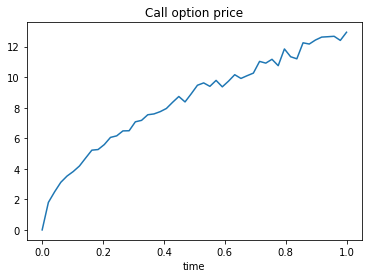

In [14]:
mont_t = mont_time(N=4000)
plt.xlabel("time")
plt.title("Call option price")
plt.plot(np.linspace(start=0, stop=1, num=50), mont_t)
plt.show()

- vega

In [15]:
def vega_time(N, sigma=0.3,  delta=0.01, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 1
    Vega = []
    
    for time in np.linspace(start=0, stop=T, num=50):
        
        dt = time / M
        # Simulating N paths with M time steps
        S1 = np.zeros((M + 1, N))
        S2 = np.zeros((M + 1, N))
        S1[0] = S0
        S2[0] = S0

        for t in range(1, M + 1):
            z = np.random.standard_normal(N) 
            S1[t] = S1[t - 1] * np.exp((r - 0.5 * (sigma ** 2)) * dt
            + sigma * np.sqrt(dt) * z)

            S2[t] = S2[t - 1] * np.exp((r - 0.5 * ((sigma+delta) ** 2)) * dt
            + (sigma+delta) * np.sqrt(dt) * z)

        # Computing the Monte Carlo estimator
        C1 = np.exp(-r * time) * np.sum(np.maximum(S1[-1] - K, 0)) / N
        C2 = np.exp(-r * time) * np.sum(np.maximum(S2[-1] - K, 0)) / N

        v = (C2 - C1)/delta
        
        Vega.append(v)
        
    return Vega

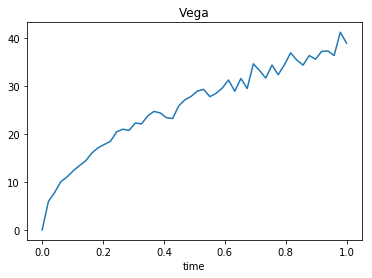

In [16]:
vega_t = vega_time(N=4000)
plt.xlabel("time")
plt.title("Vega")
plt.plot(np.linspace(start=0, stop=1, num=50),vega_t )
plt.show()

- rho

In [17]:
def rho_time(N, sigma=0.3,  delta=0.0001, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 1
    Rho = []
    for time in np.linspace(start=0, stop=T, num=50):
        
        dt = time / M


        # Simulating N paths with M time steps
        S1 = np.zeros((M + 1, N))
        S2 = np.zeros((M + 1, N))
        S1[0] = S0
        S2[0] = S0

        for t in range(1, M + 1):
            z = np.random.standard_normal(N) 
            S1[t] = S1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
            + sigma * np.sqrt(dt) * z)

            S2[t] = S2[t - 1] * np.exp(((r+delta) - 0.5 * (sigma) ** 2) * dt
            + sigma * np.sqrt(dt) * z)

        # Computing the Monte Carlo estimator
        C1 = np.exp(-r * time) * np.sum(np.maximum(S1[-1] - K, 0)) / N
        C2 = np.exp(-(r+delta) * time) * np.sum(np.maximum(S2[-1] - K, 0)) / N

        rh = (C2 - C1)/delta
        Rho.append(rh)
    return Rho

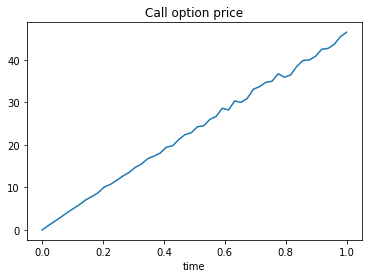

In [18]:
rho_t = rho_time(N=4000)
plt.xlabel("time")
plt.title("Rho")
plt.plot(np.linspace(start=0, stop=1, num=50), rho_t)
plt.show()

- delta

In [19]:
def Delta_time(N, sigma = 0.3,  delta=0.0001, S0 = 100, K = 100, T = 1, r = 0.02):

    M = 1
    Del = []
    for time in np.linspace(start=0.01, stop=T, num=50):
        dt = time / M


        # Simulating N paths with M time steps
        S1 = np.zeros((M + 1, N))
        S2 = np.zeros((M + 1, N))
        S1[0] = S0
        S2[0] = S0+delta

        for t in range(1, M + 1):
            z = np.random.standard_normal(N) 
            S1[t] = S1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
            + sigma * np.sqrt(dt) * z)

            S2[t] = S2[t - 1] * np.exp((r - 0.5 * (sigma) ** 2) * dt
            + sigma * np.sqrt(dt) * z)

        # Computing the Monte Carlo estimator
        C1 = np.exp(-r * time) * np.sum(np.maximum(S1[-1] - K, 0)) / N
        C2 = np.exp(-r * time) * np.sum(np.maximum(S2[-1] - K, 0)) / N

        d = (C2 - C1)/delta
        Del.append(d)
        
    return Del

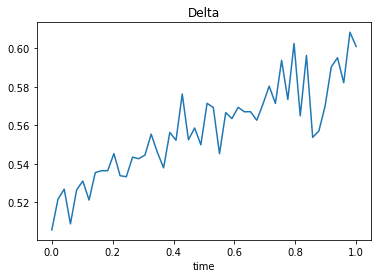

In [20]:
Delta_t = Delta_time(N=4000)
plt.xlabel("time")
plt.title("Delta")
plt.plot(np.linspace(start=0, stop=1, num=50), Delta_t)
plt.show()

#### Comments

As we can notice with the different graphs above, as we get closer to the maturity, the Monte Carlo estimations tend to become more and more stable: the estimators increase as time passes but less and less as they seem to have a concave relationship with time.